In [1]:
%pylab inline 
import pickle
import tensorflow as tf
import flowpm
from flowpm.tfpower import linear_matter_power
import os
import jax_cosmo as jc
import jax_cosmo.power as power
from astropy.cosmology import Planck15
from flowpm.utils import cic_paint, compensate_cic
from flowpm.tfpower import linear_matter_power
import DifferentiableHOS as DHOS

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Below are a few parameters
box_size = 205.   # Transverse comoving size of the simulation volume
field_size = 5    # Size of the lensing field in degrees
field_npix = 1024 # Number of pixels in the lensing field

In [3]:
# i=0
# initial_conditions=[]
# for filename in os.listdir("/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/"):
#     i=i+1
#     if i<31:
#         f=open(os.path.join('/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/', filename), 'rb')
#         res =pickle.load(f)
#         initial_conditions.append(res['initial_conditions'])
#         f.close()

In [3]:
i=0
initial_conditions=[]
for filename in os.listdir("/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/"):
    i=i+1
    if i<31:
        f=open(os.path.join('/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/', filename), 'rb')
        res =pickle.load(f)
        initial_conditions.append(res['initial_conditions'])
        f.close()

In [4]:
i=0
res_nocor=[]
for filename in os.listdir("/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/"):
    i=i+1
    if i<31:   
        f=open(os.path.join('/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/', filename), 'rb')
        res =pickle.load(f)
        res_nocor.append(res['res_nocor'])
        f.close()

In [5]:
a_states=res['res_nocor'].times
z_states=1/a_states-1


In [6]:
z_states

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([0.9134463 , 0.80203736, 0.6976795 , 0.5987958 , 0.5060402 ,
       0.41824162, 0.3348608 , 0.2547096 , 0.17847586, 0.10539865,
       0.03435981], dtype=float32)>

In [7]:
pk_nocor_z0=[]
pk_nocor_z1=[]
for i in range(30):
       field_z0 = flowpm.cic_paint(tf.zeros_like(initial_conditions[i]), res_nocor[i].states[-1][0])
       field_z0 = compensate_cic(field_z0)
       k, pkz0 = flowpm.power_spectrum(field_z0, boxsize=np.array([box_size] * 3),kmin=np.pi / box_size, dk=2 * np.pi / box_size)
       field_z1 = flowpm.cic_paint(tf.zeros_like(initial_conditions[i]), res_nocor[i].states[0][0])
       field_z1 = compensate_cic(field_z1)
       k, pkz1 = flowpm.power_spectrum(field_z1, boxsize=np.array([box_size] * 3),kmin=np.pi / box_size, dk=2 * np.pi / box_size)
       pk_nocor_z0.append(pkz0)
       pk_nocor_z1.append(pkz1)   

In [8]:
res_nocor=[]

In [9]:
mupk_nocor_z0=np.mean(tf.stack(pk_nocor_z0),axis=0)
mupk_nocor_z1=np.mean(tf.stack(pk_nocor_z1),axis=0)
stdpk_nocor_z0=np.std(tf.stack(pk_nocor_z0),axis=0)
stdpk_nocor_z1=np.std(tf.stack(pk_nocor_z1),axis=0)

In [10]:
i=0
res_cor=[]
for filename in os.listdir("/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/"):
    i=i+1
    if i<31:
        f=open(os.path.join('/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/', filename), 'rb')
        res =pickle.load(f)
        res_cor.append(res['res_cor']) 
        f.close()

In [11]:
pk_cor_z0=[]
pk_cor_z1=[]
for i in range(30):
    field_z0 = flowpm.cic_paint(tf.zeros_like(initial_conditions[i]), res_cor[i].states[-1][0])
    field_z0 = compensate_cic(field_z0)
    k, pkz0 = flowpm.power_spectrum(field_z0, boxsize=np.array([box_size] * 3),kmin=np.pi / box_size, dk=2 * np.pi / box_size)
    field_z1 = flowpm.cic_paint(tf.zeros_like(initial_conditions[i]), res_cor[i].states[0][0])
    field_z1 = compensate_cic(field_z1)
    k, pkz1 = flowpm.power_spectrum(field_z1, boxsize=np.array([box_size] * 3),kmin=np.pi / box_size, dk=2 * np.pi / box_size)
    pk_cor_z0.append(pkz0)
    pk_cor_z1.append(pkz1)

        

In [12]:
res_cor=[]

In [13]:
mupk_cor_z0=np.mean(tf.stack(pk_cor_z0),axis=0)
mupk_cor_z1=np.mean(tf.stack(pk_cor_z1),axis=0)
stdpk_cor_z0=np.std(tf.stack(pk_cor_z0),axis=0)
stdpk_cor_z1=np.std(tf.stack(pk_cor_z1),axis=0)

In [14]:
cosmo=jc.Planck15()

In [15]:
target_pkz0 = power.nonlinear_matter_power(cosmo, k, a_states[-1])
target_pkz1 = power.nonlinear_matter_power(cosmo, k, a_states[0])

/global/homes/d/dlan/.local/perlmutter/tensorflow2.6.0/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:5792: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


In [16]:
import cmasher as cmr
import matplotlib.colors as colors
from matplotlib import gridspec


In [17]:

cmap = cmr.pride
col= cmr.pride(np.linspace(0.,1,6))   

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0., vmax=1))


### Plot showing the power spectrum from the N body simulation with and without correction at 2 different redshifts

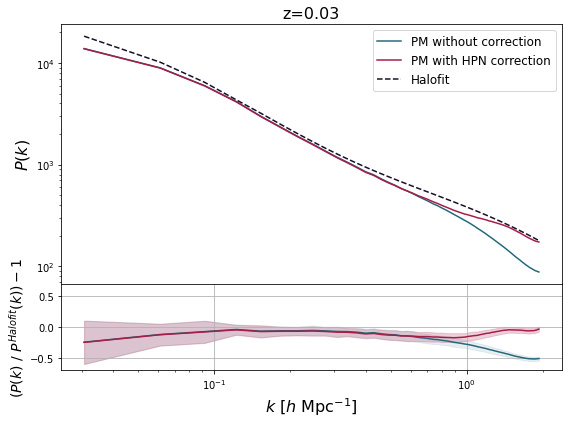

In [20]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1],hspace=0) 
ax0 = plt.subplot(gs[0])
ax0.loglog(k, mupk_nocor_z0[0],label='PM without correction',color=col[1])
ax0.loglog(k, mupk_cor_z0[0],label='PM with HPN correction',color=col[4])
ax0.loglog(k, target_pkz0,'--',label='Halofit',color=col[0])
ax0.label_outer()
ax0.set_title('z=0.03',fontsize=16)
plt.legend(fontsize='large')
ax0.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=14)
ax0.set_ylabel(r"$P(k)$", fontsize=16)
ax1 = plt.subplot(gs[1])
ax1.semilogx(k, mupk_nocor_z0[0]/target_pkz0-1,label='PM without correction',color=col[1])
ax1.semilogx(k, mupk_cor_z0[0]/target_pkz0-1,label='PM with HPN-correction',color=col[4])   
ax1.fill_between(k, ((mupk_nocor_z0[0]/target_pkz0)-1)-(stdpk_nocor_z0[0]/mupk_nocor_z0[0]), ((mupk_nocor_z0[0]/target_pkz0)-1)+(stdpk_nocor_z0[0]/mupk_nocor_z0[0]), alpha=.1,color=col[1])
ax1.fill_between(k, ((mupk_cor_z0[0]/target_pkz0)-1)-(stdpk_cor_z0[0]/mupk_cor_z0[0]),  ((mupk_cor_z0[0]/target_pkz0)-1)+(stdpk_cor_z0[0]/mupk_cor_z0[0]), alpha=.2,color=col[4])
ax1.set_ylabel(r"$ (P(k) \ / \ P^{Halofit}(k))-1$",fontsize=14)
ax1.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=16)
ax1.set_ylim(-0.7,0.7)
plt.tight_layout()
plt.grid(True)
#plt.savefig('../figures/residual_pk_z0_zoom.pdf')


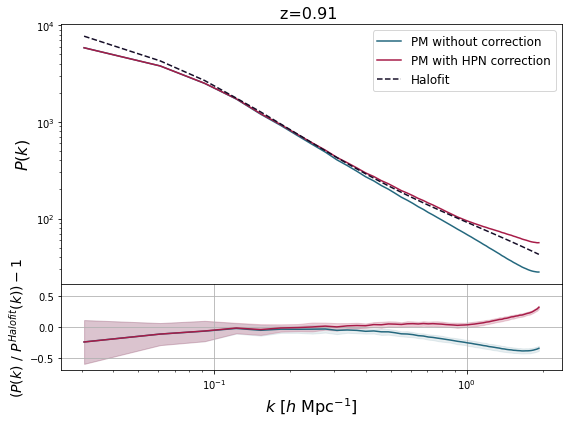

In [21]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1],hspace=0) 
ax0 = plt.subplot(gs[0])
ax0.loglog(k, mupk_nocor_z1[0],label='PM without correction',color=col[1])
ax0.loglog(k, mupk_cor_z1[0],label='PM with HPN correction',color=col[4])
ax0.loglog(k, target_pkz1,'--',label='Halofit',color=col[0])
ax0.label_outer()
ax0.set_title('z=0.91 ',fontsize=16)
plt.legend(fontsize='large')
ax0.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=14)
ax0.set_ylabel(r"$P(k)$", fontsize=16)
ax1 = plt.subplot(gs[1])
ax1.semilogx(k, mupk_nocor_z1[0]/target_pkz1-1,label='PM without correction',color=col[1])
ax1.semilogx(k, mupk_cor_z1[0]/target_pkz1-1,label='PM with HPN correction',color=col[4])   
ax1.fill_between(k, ((mupk_nocor_z1[0]/target_pkz1)-1)-(stdpk_nocor_z1[0]/mupk_nocor_z1[0]), ((mupk_nocor_z1[0]/target_pkz1)-1)+(stdpk_nocor_z1[0]/mupk_nocor_z1[0]), alpha=.1,color=col[1])
ax1.fill_between(k, ((mupk_cor_z1[0]/target_pkz1)-1)-(stdpk_cor_z1[0]/mupk_cor_z1[0]),  ((mupk_cor_z1[0]/target_pkz1)-1)+(stdpk_cor_z1[0]/mupk_cor_z1[0]), alpha=.2,color=col[4])

ax1.set_ylabel(r"$ (P(k) \ / \ P^{Halofit}(k))-1$",fontsize=14)
ax1.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=16)
ax1.set_ylim(-0.7,0.7)
plt.tight_layout()
plt.grid(True)
plt.savefig('../figures/residual_pk_z1_zoom.pdf')

### Density plane

In [22]:
im_nocor_z0=flowpm.cic_paint(tf.zeros_like(res['initial_conditions']), res['res_nocor'].states[-1][0])[0].numpy().sum(axis=0)
im_cor_z0=flowpm.cic_paint(tf.zeros_like(res['initial_conditions']), res['res_cor'].states[-1][0])[0].numpy().sum(axis=0)
im_nocor_z1=flowpm.cic_paint(tf.zeros_like(res['initial_conditions']), res['res_nocor'].states[0][0])[0].numpy().sum(axis=0)
im_cor_z1=flowpm.cic_paint(tf.zeros_like(res['initial_conditions']), res['res_cor'].states[0][0])[0].numpy().sum(axis=0)
TI=['PM z=0.03','PM+HPN z=0.03','PM z=0.91','PM+HPN z=0.91']
image_paths=[im_nocor_z0,im_cor_z0,im_nocor_z1,im_cor_z1]

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

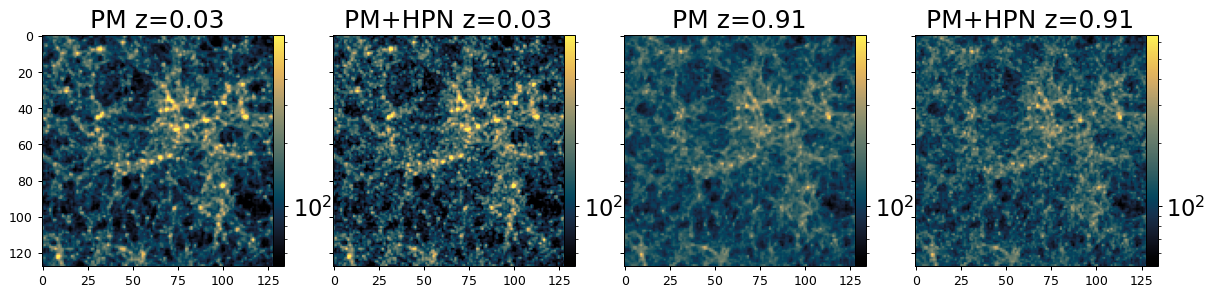

In [24]:
norm=colors.LogNorm(vmax=im_cor_z1.max(),
                          vmin=im_cor_z1.min())

cmap = cmr.eclipse
ticks_size = 18
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,5), dpi=90)
for imp, ax, ci in zip(image_paths, axes.ravel(),TI):
    ax.imshow(imp, cmap=cmap, norm=norm)
    ax.set_aspect('equal')
    ax.set_title(ci, fontsize=20)
    ax.grid(False)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.)
    cb = f.colorbar(ax.imshow(imp, cmap=cmap, norm=norm), cax=cax)
    cb.ax.tick_params(labelsize=ticks_size)
fig.tight_layout()
#plt.savefig('../figures/cluster_3D.pdf')

### Import the maps with and without correction

In [28]:
m_nocorr=[]
for filename in os.listdir("/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/"):
        if filename != "descrizione":
            f=open(os.path.join('/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/', filename), 'rb')
            res1 =pickle.load(f)
            km=res1['m_nocor']
            f.close()
            m_nocorr.append(km)


m_corr=[]
for filename in os.listdir("/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/"):
        if filename != "descrizione":
            f=open(os.path.join('/pscratch/sd/d/dlan/result_paper_IA_0/map_corr_vs_nocorr_0914/', filename), 'rb')
            res1 =pickle.load(f)
            km=res1['m_cor']
            f.close()
            m_corr.append(km)

### Show one map with and without correction

In [29]:
image_kmap=[m_nocorr[0][0],m_corr[0][0]]
TIX=['DLL', 'DLL + HPN correction']

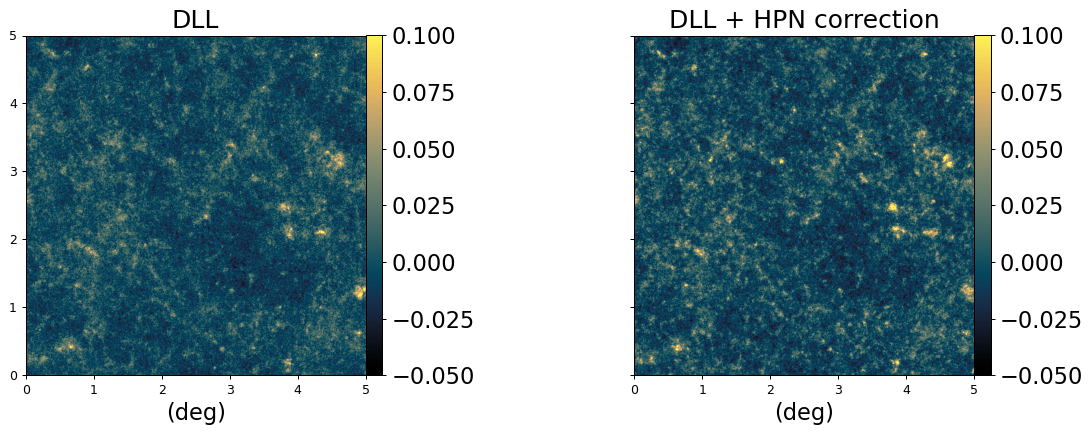

In [30]:
cmap = cmr.eclipse
ticks_size = 18

f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,5), dpi=90)
for imp, ax, ci in zip(image_kmap, axes.ravel(),TIX):
    ax.imshow(imp, cmap=cmap, extent=[0,5,0,5], vmax=0.20,vmin=-0.05)
    ax.set_aspect('equal')
    ax.set_title(ci, fontsize=20)
    ax.grid(False)
    ax.set_xlabel('(deg)', fontsize=ticks_size)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.)
    cb = f.colorbar(ax.imshow(imp, extent=[0,5,0,5], cmap=cmap,vmax=0.10,vmin=-0.05), cax=cax)
    cb.ax.tick_params(labelsize=ticks_size)
#fig.tight_layout()
#plt.savefig('../figures/kmap_dll_vs_hpn.pdf')

### Compute the angular power spectrum of lensing maps with and without correction

In [31]:
ps_nocorr=[]
for i in range(len(m_nocorr)):
    l,p=DHOS.statistics.power_spectrum(m_nocorr[i][0],field_size,field_npix) 
    ps_nocorr.append(p)

ps_corr=[]
for i in range(len(m_corr)):
    l,p=DHOS.statistics.power_spectrum(m_corr[i][0],field_size,field_npix) 
    ps_corr.append(p)


In [32]:
cls_mean_nocorr=np.mean(ps_nocorr,axis=0)
cls_mean_corr=np.mean(ps_corr,axis=0)
cls_std_nocorr=np.std(ps_nocorr,axis=0)
cls_std_corr=np.std(ps_corr,axis=0)

In [35]:
kTNG_S21=[]
for filename in os.listdir("/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark"):
    fname=os.path.join('/global/cfs/cdirs/lsst/shared/external/kappaTNG/kappaTNG-Dark',  filename+"/run001/kappa21.dat")
    with open(fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappaTNG = np.fromfile(f, dtype="float", count=field_npix* field_npix)
        dummy = np.fromfile(f, dtype="int32", count=1)
    kappaTNG = kappaTNG.reshape((field_npix, field_npix))
    kTNG_S21.append(kappaTNG)

In [36]:
ps_kTNG_S21=[]
for i in range(100):
    l,ps=DHOS.statistics.power_spectrum(kTNG_S21[i],field_size,field_npix)
    ps_kTNG_S21.append(ps)
mups_kTNG_S21=np.mean(ps_kTNG_S21,axis=0)

In [37]:
col = cmr.pride(np.linspace(0.,1,6))  

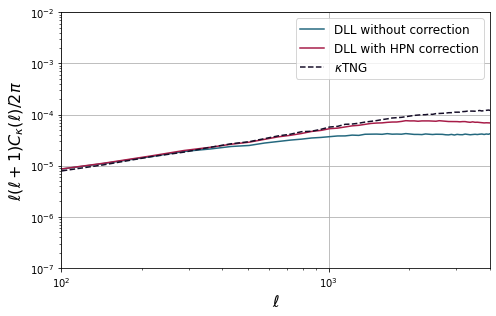

In [39]:
fig = plt.figure(figsize=(7, 4.5))
loglog(l, l*(l+1)*cls_mean_nocorr/(2*np.pi),label='DLL without correction',color=col[1])
loglog(l, l*(l+1)*cls_mean_corr/(2*np.pi),label='DLL with HPN correction',color=col[4])
loglog(l, l*(l+1)*mups_kTNG_S21/(2*np.pi),'--',label='$\kappa$TNG',color=col[0])
ylabel('$\ell(\ell+1)C_{\kappa}(\ell) /2\pi$',fontsize=16)
plt.grid(True)
xscale('log')
xlim(1e2,4e3)
ylim(1e-7,1e-2)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()
plt.savefig('../figures/cls_DLL_vs_ktng_hpn.pdf')

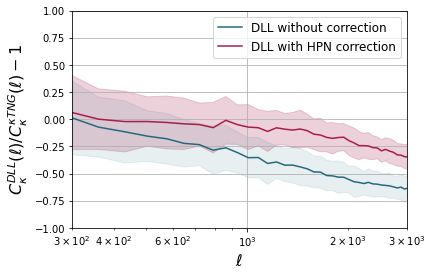

In [40]:
fig, ax = plt.subplots()
plt.semilogx(l[1:], (cls_mean_nocorr[1:])/mups_kTNG_S21[1:]-1,label='DLL without correction',color=col[1])
plt.semilogx(l[1:], (cls_mean_corr[1:])/mups_kTNG_S21[1:]-1,label='DLL with HPN correction',color=col[4])
plt.grid(True)
xlim(3e2,3e3)
ylim(-1,1)
ax.fill_between(l[1:], ((cls_mean_corr[1:]/mups_kTNG_S21[1:])-1)-(cls_std_corr[1:]/cls_mean_corr[1:]), ((cls_mean_corr[1:]/mups_kTNG_S21[1:])-1)+(cls_std_corr[1:]/cls_mean_corr[1:]), alpha=.2,color=col[4])
ax.fill_between(l[1:], ((cls_mean_nocorr[1:]/mups_kTNG_S21[1:])-1)-(cls_std_nocorr[1:]/cls_mean_nocorr[1:]), ((cls_mean_nocorr[1:]/mups_kTNG_S21[1:])-1)+(cls_std_nocorr[1:]/cls_mean_nocorr[1:]), alpha=.1,color=col[1])
ylabel('$C_{\kappa}^{DLL}(\ell)/C_\kappa^{\kappa TNG}(\ell)-1$',fontsize=16)
xlabel('$\ell$',fontsize=16)
legend(fontsize='large')
plt.savefig('../figures/res_cls_DLL_vs_ktng_hpn.pdf',bbox_inches='tight')

